# Bike Share Dataset Exploration
### by Affonso Ciekalski 


## Introduction
This project analyses a dataset containing information on a bike-sharing system in the San Francisco Bay Area. It includes the duration, the start, and the end of the trips, as well as information about the users of the system.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# load in the dataset
bike_share = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# overview of dataset structure
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# overview of the data
bike_share.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# descriptive statistics for the duration
bike_share.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [7]:
# convert duration from seconds to minutes
bike_share['duration_min'] = bike_share['duration_sec'] // 60

# drop the column with duration in seconds
bike_share.drop(columns='duration_sec', inplace = True)

bike_share.duration_min.head()

0     869
1     708
2    1030
3     608
4      26
Name: duration_min, dtype: int64

In [8]:
# convert start_time and end_time to Datatime DataType
bike_share.start_time = pd.to_datetime(bike_share.start_time)
bike_share.end_time = pd.to_datetime(bike_share.end_time)

# create a column for the day of the week when the trip started
bike_share['day_of_week'] = bike_share.start_time.dt.day_name()

# create a column for the time of the day when the trip started
bike_share['time_of_day'] = bike_share.start_time.dt.hour

In [9]:
# create an age attribute by subtracting 2019 (year of the data) and member_birth_year column
bike_share['member_age'] = 2019 - bike_share['member_birth_year']

In [10]:
# descriptive statistics for the age of the users
bike_share.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [11]:
geo_cols = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'] 

# drop geolocalization data
bike_share.drop(columns = geo_cols, inplace = True)

In [12]:
# after wrangling phase
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null int64
day_of_week                183412 non-null object
time_of_day                183412 non-null int64
member_age                 175147 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(3), object(6)
memory usage: 21.0+ MB


In [13]:
# convert 'day_of_week' into ordered categorical type
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
ordered_week = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
bike_share['day_of_week'] = bike_share['day_of_week'].astype(ordered_week)

### What is the structure of your dataset?

> This dataset presents 183,412 trips registered with 15 features after preliminary wrangling actions. I added up features based on the original ones and dropped those related to geolocalization. The resulting dataset contains information on the trips (start time, end time, stations, bike ids, duration in minutes, day of the week, time of the day) and on the users (year of birth, age, user type, gender). Most variables are nominal. The two main exceptions are the user age and the duration of the trips. 

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in undertanding how the usage of the bike-sharing system varies along the week and if there are any relevance of the users characteristics in that dynamic.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The variables containing data about time of the day, trip duration, and day of the week will certainly support the visualization of the system's usage along the week. Besides, the age, gender and user type columns will be essential for my investigation on the people using the service. 

## Univariate Exploration

> **Firstly, I want to better understand who uses the bike-sharing service. For this, I'll take the features containing the members' information.**

<a id='user_type_composition'></a>
#### 1. What is the most common type of user?

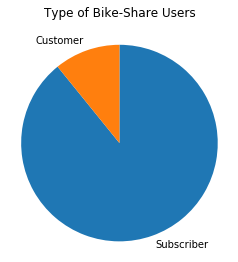

In [14]:
# plotting relative frequency of each type of user 
usertype_freq = bike_share.user_type.value_counts()

plt.pie(usertype_freq, labels = usertype_freq.index, startangle = 90, counterclock = False)
plt.title('Type of Bike-Share Users', y = 1.05)
plt.axis('square');

**Almost 90% of all users are subscribers** of the bike-sharing service as shown in the pie chart, while customers comprise roughly 10%.

#### 2. What is the gender composition of the bike-sharing users?

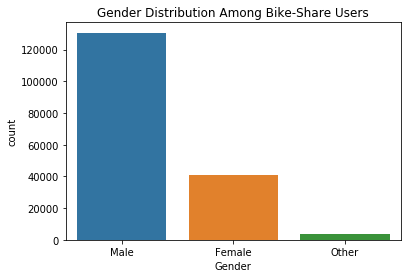

In [15]:
# gender distribution in absolute numbers
order = bike_share.member_gender.value_counts().index
sb.countplot(data = bike_share, x = 'member_gender', order = order)
plt.title('Gender Distribution Among Bike-Share Users')
plt.xlabel('Gender');

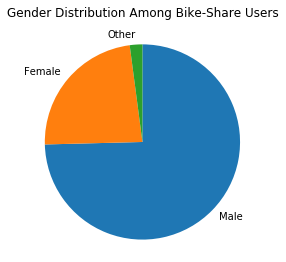

In [16]:
# plot relative frequency of each gender 
gender_freq = bike_share.member_gender.value_counts()

plt.pie(gender_freq, labels = gender_freq.index, startangle = 90, counterclock = False)
plt.title('Gender Distribution Among Bike-Share Users', y = 1.05)
plt.axis('square');

**In absolute numbers, more than 120,000 trips were made by people identifying themselves as Male. That comprises around 75% of all users as shown in the pie chart. Those made by Female users account for approximately 40,000 trips.** 

This huge gender gap is quite common around the world. One of the most probable reasons for this is that women feel unsafe on the streets. 

As a reference, the following articles present more information on the subject:
- Lekach, S. (2019, December 11). *Women feel more uncomfortable biking to work than men, Strava report finds*. Mashable. ([link](https://mashable.com/article/bicycling-commute-strava-data-gender-parity))
- Moore, D. (2019, December 8). *Women love bikes—so why don’t they cycle to work?*. Quartz. ([link](https://qz.com/quartzy/1745124/why-women-dont-cycle-and-what-cities-can-do-about-it/))
- Boucher, T. (2016, August 29). The Science Behind Cycling’s Enormous Gender Discrepancy. *Cool Green Science*. ([link](https://blog.nature.org/science/2016/08/29/the-science-behind-cyclings-enormous-gender-discrepancy/))

#### 3. Which age group uses the service the most?

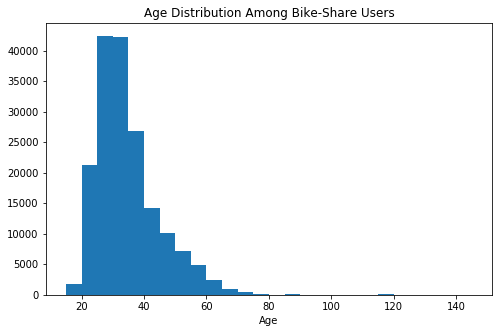

In [17]:
# plot age distribution with a five-year bin size
plt.figure(figsize = (8, 5))
bins = np.arange(15, bike_share['member_age'].max()+5, 5)
plt.hist(bike_share['member_age'].dropna(), bins = bins)
plt.title('Age Distribution Among Bike-Share Users')
plt.xlabel('Age');

In [18]:
# select outliers using 90 as age limit for this analysis
over_90_years = bike_share[['user_type','member_birth_year','member_age', 'duration_min', 
                            'day_of_week', 'time_of_day']].loc[bike_share['member_age'] > 90]
over_90_years

,user_type,member_birth_year,member_age,duration_min,day_of_week,time_of_day
1285,Subscriber,1900.0,119.0,2,Thursday,19
10827,Subscriber,1900.0,119.0,21,Wednesday,19
16087,Subscriber,1900.0,119.0,18,Wednesday,8
17981,Subscriber,1920.0,99.0,6,Tuesday,19
18885,Subscriber,1920.0,99.0,7,Tuesday,17
19375,Customer,1900.0,119.0,10,Tuesday,17
21424,Subscriber,1900.0,119.0,23,Tuesday,8
21506,Customer,1900.0,119.0,11,Tuesday,9
24042,Subscriber,1900.0,119.0,3,Monday,18
26133,Subscriber,1900.0,119.0,6,Monday,13


It stands out that most data is positioned on the left of the plot, indicating the presence of outliers to the right. Indeed, in the preliminary wrangling step, the descriptive statistics of the 'member_age' column shows a maximum value of 141 years old. 

The incorrect registration of the birth year is one possible reason for these 77 trips made by people older than 90.

To avoid the influence of these age inconsistencies in further investigations, I will drop them from the dataset settling 90 as age limit. 

In [19]:
# dropping rows with member over 90 years old
bike_share = bike_share.drop(over_90_years.index)
bike_share.member_age.describe()

count    175070.000000
mean         34.157011
std           9.966723
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: member_age, dtype: float64

In [20]:
bike_share.describe()

,start_station_id,end_station_id,bike_id,member_birth_year,duration_min,time_of_day,member_age
count,183138.000000,183138.000000,183335.000000,175070.000000,183335.000000,183335.000000,175070.000000
mean,138.570215,136.249135,4472.836223,1984.842989,11.609938,13.458429,34.157011
std,111.767749,111.513349,1664.406163,9.966723,29.913932,4.725011,9.966723
min,3.000000,3.000000,11.000000,1930.000000,1.000000,0.000000,18.000000
25%,47.000000,44.000000,3777.000000,1980.000000,5.000000,9.000000,27.000000
50%,104.000000,100.000000,4957.000000,1987.000000,8.000000,14.000000,32.000000
75%,239.000000,235.000000,5502.000000,1992.000000,13.000000,17.000000,39.000000
max,398.000000,398.000000,6645.000000,2001.000000,1424.000000,23.000000,89.000000


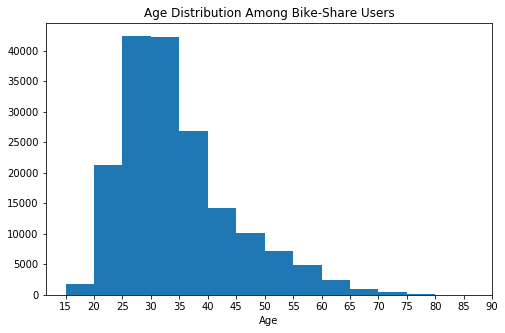

In [21]:
# instantiate the age of the users
user_age = bike_share['member_age']

# with an age limit of 90, plotting age distribution with a five-year bin size
plt.figure(figsize = (8, 5))
bins = np.arange(15, 90, 5)
plt.hist(user_age.dropna(), bins = bins)
plt.title('Age Distribution Among Bike-Share Users')
plt.xlabel('Age')
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]);

Taking into account the age limit of 90, it's possible to notice that the age distribution has a long tail to the right. Besides, people aged from 25 to 35 are the most frequent users of the bike-sharing service. 

Above, I used a bin size of 5 years and it's not clear how the data behave for ages below 25. In other words, what happens from 15 to 25 if the age of the users in the dataset starts at 18. 

To get a more nuanced distribution and understand what happens to the left side of the plot, I will use bin sizes of two-year and one-year. 

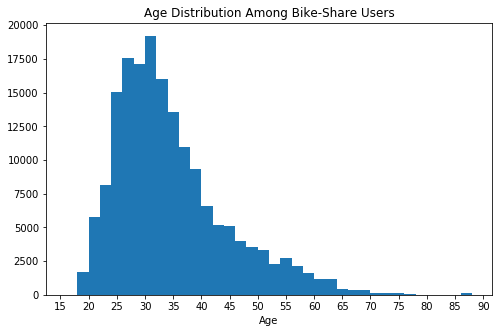

In [22]:
# with an age limit of 90, plotting age distribution with a smaller bin size (two-year)
plt.figure(figsize = (8, 5))
bins = np.arange(16, 90, 2)
plt.hist(user_age.dropna(), bins = bins)
plt.title('Age Distribution Among Bike-Share Users')
plt.xlabel('Age')
plt.xticks([15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]);

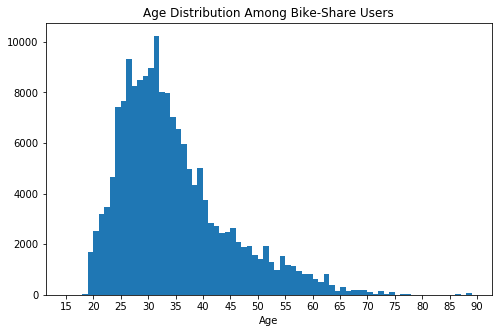

In [23]:
# with an age limit of 90, plotting age distribution with an even smaller bin size (one-year)
plt.figure(figsize = (8, 5))
bins = np.arange(15, 90, 1)
plt.hist(user_age.dropna(), bins = bins)
plt.title('Age Distribution Among Bike-Share Users')
plt.xlabel('Age')
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]);

In [24]:
# proportion of users that are in the age group ranging from 25 to 35 years old
sum(bike_share.query('member_age >= 25 and member_age <= 35').member_age.value_counts()) / bike_share.member_age.shape[0]

0.49734093326424306

Confirming what we found before, **people in the age group ranging from 25 to 35 made almost half of the trips in the dataset, thus the age group that uses the service the most.**

In addition, when compared with plots using bigger bin sizes, it's noticiable a more subtle decline in the number of trips made by users under 25. However, this tendency stops abruptly at 19, with just a few entries at 18.

We cannot affirm with certainty, but, if the system allowed users under 18, we could end up with a unimodal distribution slightly skewed to the right. 

> **Now, I will focus on when the trips occurred and for how long they lasted.**

#### 4. How long does it take for a user to get to his/her destination?

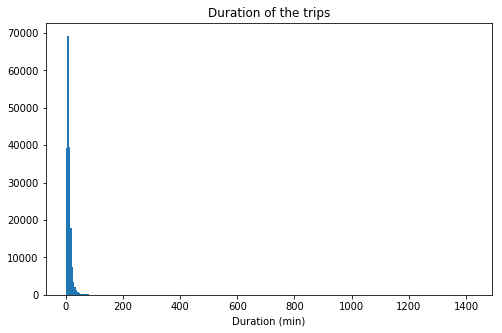

In [25]:
# instantiate the trip duration
trip_duration = bike_share['duration_min']

# plotting duration with a five-minute bin size
plt.figure(figsize = (8, 5))
bins = np.arange(0, trip_duration.max(), 5)
plt.hist(trip_duration, bins = bins)
plt.title('Duration of the trips')
plt.xlabel('Duration (min)');

It is crystal clear that we are dealing here with huge outliers on the right. It indicates trips of over 1000 minutes of duration, what would correspond to people riding bikes for more than 16 hours. 

One possible reason for this is that a person may take a bike to visit friends or go out with them and don't have access to a bike station. As a result, the time of the ride keeps running till the person park the bike in a station. 

That said, it is quite hard to visualize the dynamic of this data as most counts are close to zero in an almost one-bar plot. 

In [26]:
# select outliers with duration over 50 minutes
over_50_min = bike_share[['duration_min', 'time_of_day']].loc[trip_duration > 50]
over_50_min

,duration_min,time_of_day
0,869,17
1,708,18
2,1030,12
3,608,17
53,56,22
55,57,22
56,52,22
91,93,21
163,83,21
199,252,18


In [27]:
# proportion of trips longer than 50 minutes to the total number of trips
bike_share[['duration_min']].loc[trip_duration > 50].shape[0] / bike_share['duration_min'].shape[0]

0.012261706711757166

More than 2000 trips had a duration of over 50 minutes. However, this accounts for just over 1% of the total trips. 

To better visualize the data, I will apply 50 minutes as the upper limit for the duration and drop all those trips over it. It seems reasonable to adopt such a limit as people might use the service to practice physical activity or make long trips. 

In [28]:
# drop trips with duration over 50 minutes
bike_share = bike_share.drop(over_50_min.index)
bike_share.duration_min.describe()

count    181087.000000
mean          9.769348
std           7.093607
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max          50.000000
Name: duration_min, dtype: float64

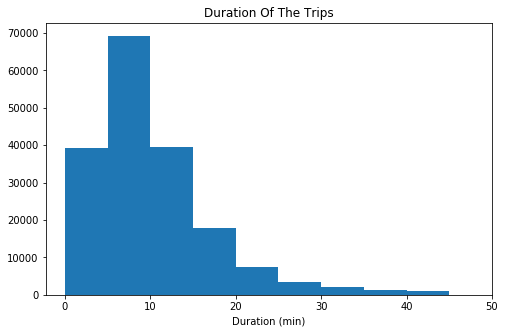

In [29]:
# instantiate the trip duration
trip_duration = bike_share['duration_min']

# plot duration with a five-minute bin size with duration limited at 50
plt.figure(figsize = (8, 5))
bins = np.arange(0, 50, 5)
plt.hist(trip_duration, bins = bins)
plt.title('Duration Of The Trips')
plt.xlabel('Duration (min)')
plt.xticks([0, 10, 20, 30, 40, 50]);

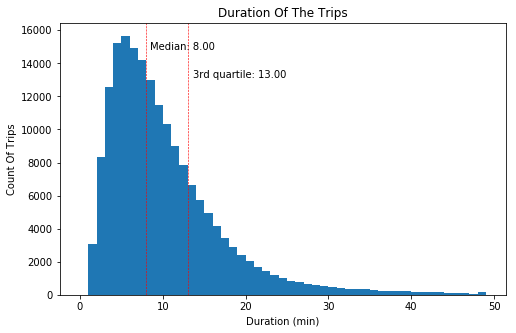

In [30]:
# plot duration with a five-minute bin size with duration limited at 50
plt.figure(figsize = (8, 5))
bins = np.arange(0, 50, 1)

plt.hist(trip_duration, bins = bins)
plt.title('Duration Of The Trips')
plt.xlabel('Duration (min)')
plt.ylabel('Count Of Trips')

min_ylim, max_ylim = plt.ylim()
# plot the median
plt.axvline(trip_duration.median(), c = 'r', linestyle = 'dashed', linewidth = 0.6)
plt.text(trip_duration.median()*1.05, max_ylim*0.9, 
         'Median: {:.2f}'.format(trip_duration.median()), color = 'k')

# plot the third quartile
plt.axvline(trip_duration.quantile(0.75), c = 'r', linestyle = 'dashed', linewidth = 0.6)
plt.text(trip_duration.quantile(0.75)*1.05, max_ylim*0.8, 
         '3rd quartile: {:.2f}'.format(trip_duration.quantile(0.75)), color = 'k');

After plotting the data using a bin size of five minutes, I noticed that this plot has a right-skewed distribution. This trend is clearly confirmed by plotting the same data using a smaller bin size of one minute. 

I decided to depict the median for the mean suffers a lot of influence from the longer trips what makes it to be more to the right. **Here we found that half of the trips take less than 8 minutes. Indeed, I found useful to represent the third quartile to show that 75% of all trips take less than 13 minutes.** Taking this into account we could even consider reducing the duration limit of the trips. 

In [31]:
# transform the describe() to a scale of log10
np.log10(trip_duration.describe())

count    5.257887
mean     0.989866
std      0.850867
min      0.000000
25%      0.698970
50%      0.903090
75%      1.113943
max      1.698970
Name: duration_min, dtype: float64

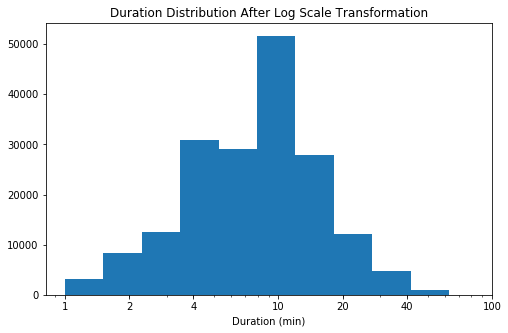

In [32]:
# log transformation of the duration distribution
# setting figure size
plt.figure(figsize = (8, 5))

# setting bin size
bins = 10 ** np.arange(0, 1.8+0.1, 0.18)

# Generate the x-ticks
ticks = [1, 2, 4, 10, 20, 40, 100]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# plot log-scaled duration distribution 
plt.hist(trip_duration.dropna(), bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Duration Distribution After Log Scale Transformation')
plt.xlabel('Duration (min)');

When plotting on a log-scale, the duration distribution looks unimodal with the peak at 10. Most of the durations range from 4 to 20 minutes. 

#### 5. Which day of the week is the busiest one?

Considering that the days of the week have an established order, I will work with a bar chart to depict the different levels of this ordinal data.

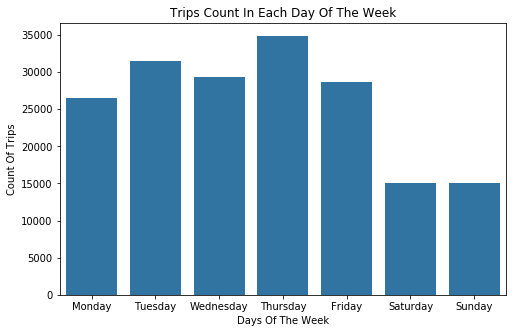

In [33]:
# plotting frequency of each time of the day
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[0]
sb.countplot(data = bike_share, x = 'day_of_week', color = base_color)
plt.title('Trips Count In Each Day Of The Week')
plt.xlabel('Days Of The Week')
plt.ylabel('Count Of Trips');

The bar chart above shows the usage of the bike-share system along the week. **Thursday is the busiest day for the service.** Besides, it is possible to take from this plot that weekdays are busier than weekends.  

<a id='time_of_day'></a>
#### 6. Which is the busiest time of the day?

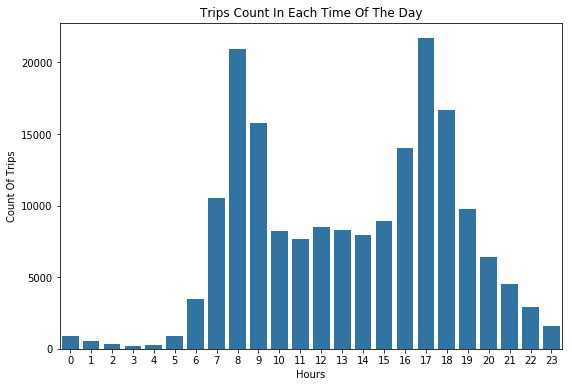

In [34]:
# plotting the number of trips made at each time of the day
plt.figure(figsize=(9,6))
base_color = sb.color_palette()[0]
sb.countplot(data = bike_share, x = 'time_of_day', color = base_color)
plt.title('Trips Count In Each Time Of The Day')
plt.xlabel('Hours')
plt.ylabel('Count Of Trips');

Here we have the overall count of trips in each hour of the day without considering a specific day of the week. **The plot presents two peaks of usage, one at 7/8/9 hours and another at 16/17/18 hours.** The most probable reason is that these are the times when people go to work and go back home, respectively.

However, this plot hide the variation that happens along the days of the week; most people don't work on weekends. To better understand the usage behavior of the service, I will further look at it through bivariate plots.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After dropping the outliers from the 'duration_min' column, I plotted the duration distribution using a bin size of one minute. The resulting plot had a very long tail to the right extending till 50 minutes, the limit I established for this analysis.
>
> Even though I could visualize where most of the data fell in the x-axis, I decided to perform a log-scale transformation to see what else I could get from the data. Under this transformation, the duration had a unimodal distribution with most of the trips lasting from 4 to 20 minutes. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As soon as I made the first plot of the age distribution, I noticed the presence of outliers to the right with the maximum value being a user aged over 140 years old. I decided to set 90 as an age limit and then I dropped the 77 inconsistencies found over this limit. 
>
> A similar situation happened when analysing the duration of the trips. Some of them lasted longer than 1000 minutes, or over 16 hours. To avoid the influence of these outliers, I limited the analysis to trips with durations up to 50 minutes and I dropped the points above it.

## Bivariate Exploration

> **I will first analyze the relationship between the numeric variables.**

**1. Does the increase of the user age change the duration of the trips?**

              duration_min  member_age
duration_min      1.000000    0.024732
member_age        0.024732    1.000000


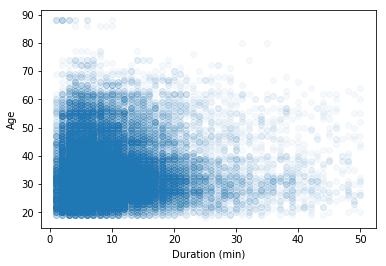

In [35]:
# correlation between the numeric variables
print(bike_share[['duration_min', 'member_age']].corr())

# creating a sample to avoid overplotting and reduce the time for plotting
bike_share_samp = bike_share.sample(n=36000, replace = False)

# plotting the correlation between the numeric variables
plt.scatter(data = bike_share_samp, x = 'duration_min', y = 'member_age', alpha = 1/25)
plt.xlabel('Duration (min)')
plt.ylabel('Age');

**As shown by the plot above, there isn't a strong correlation between age and the trips duration.** Yet, the plot similarly depicts what we found during the individual analysis of these features. In other words, most of the duration points are located in the range 2 to 15 minutes, while, most of the age points are around 20 to 40 years.   

Even though I applied transparency in the data points, it's still hard to visualize any relationship between the variables. In fact, this also proves that we have here a weak relation. 

> **Now, I will look at the correlations of each numeric variable with each categoric variable to check if there are any important correlations or points of attention.**

**2. Does the trip duration vary for different types of user? And what about in terms of gender?**

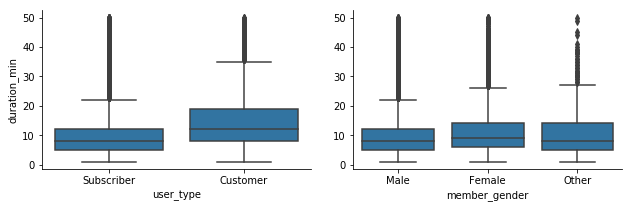

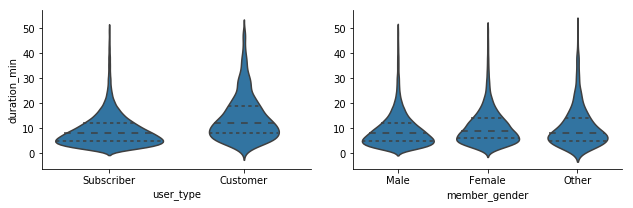

In [36]:
# plot box plots with the relationship of the numeric variable 'duration_min' and 
# the categoric variables 'user_type' and 'member_gender'
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

g = sb.PairGrid(data = bike_share_samp, x_vars = ['user_type', 'member_gender'], 
                y_vars = ['duration_min'], size = 3, aspect = 1.5)
g.map(boxgrid);

# plot violin plots with the relationship of the numeric variable 'duration_min' and 
# the categoric variables 'user_type' and 'member_gender'
g = sb.PairGrid(data = bike_share_samp, x_vars = ['user_type', 'member_gender'], 
                y_vars = ['duration_min'], size = 3, aspect = 1.5)
g.map(sb.violinplot, inner = 'quartile');

First, I plotted box plots to look at the descriptive statistics and I found that **trips made by customers are usually longer than those of subscribers. When it comes to gender, the differences are not that significant.** Trips made by people identifying themselves as Female or Other are slightly longer than those made by Male individuals. 

One possible reason that could explain these variances is the fact that in both cases we have a [huge disparity](#user_type_composition) in terms of frequency of each categoric level in the data. In other words, long trips may have a bigger impact for customers than for subscribers, as well as for Female and Other than for Male. 

Secondly, I used violin plots to check for further points of attention. It is possible to see that for subscribers most trips are under 10 minutes with a plot more spread out under the median. For the gender plots, there is just a slight difference in how spread out is the first quartile. 

**3. When it comes to age, do we have any significant variance among different user types? And among users from different genders?**

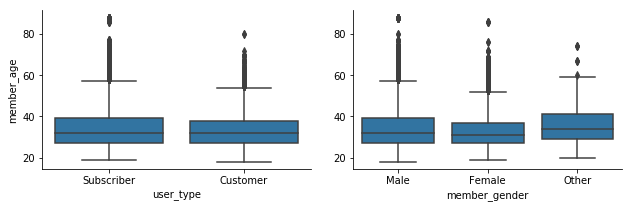

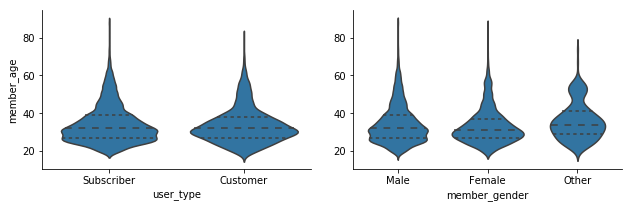

In [37]:
# plot box plots with the relation of the numeric variable 'member_age' with 
# the categoric variables 'user_type' and 'member_gender'
g = sb.PairGrid(data = bike_share_samp, x_vars = ['user_type', 'member_gender'], 
                y_vars = ['member_age'], size = 3, aspect = 1.5)
g.map(boxgrid);

# plot violin plots with the relation of the numeric variable 'member_age' with 
# the categoric variables 'user_type' and 'member_gender'
g = sb.PairGrid(data = bike_share_samp, x_vars = ['user_type', 'member_gender'], 
                y_vars = ['member_age'], size = 3, aspect = 1.5)
g.map(sb.violinplot, inner = 'quartile');

**There isn't an important age variance between the user types**; the median age is almost the same. However, the third quartile of the subscribers is a bit higher than that of customers. The violin plot for user type confirms that subscribers have a slightly higher proportion of older individuals when compared to customers. 

**In terms of gender, we notice that people identifying themselves as Male or Female are younger than individuals with a gender other than these two.** The violin plot comes in handy to understand what happens here. It is possible to visualize that the distribution of people from other genders has a larger top, with a higher proportion of users over 40 years old. **In addition, we may notice that Male individuals are slightly older than Female.** 

**4. Which day of the week presents longer trip durations?**

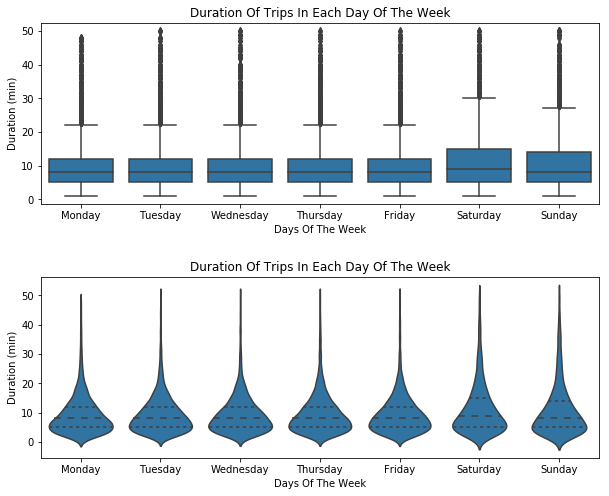

In [38]:
plt.figure(figsize = [10,8])
base_color = sb.color_palette()[0]

# box plots with the relation of the numeric variable 'duration_min'  
# with the categoric variable 'day_of_week'
plt.subplot(2, 1, 1)
sb.boxplot(data = bike_share_samp, x = 'day_of_week', y = 'duration_min', color = base_color)
plt.title('Duration Of Trips In Each Day Of The Week')
plt.xlabel('Days Of The Week')
plt.ylabel('Duration (min)');

# violin plots with the relation of the numeric variable 'duration_min'
# with the categoric variable 'day_of_week'
plt.subplot(2, 1, 2)
sb.violinplot(data = bike_share_samp, x = 'day_of_week', y = 'duration_min', color = base_color, inner = 'quartile')
plt.title('Duration Of Trips In Each Day Of The Week')
plt.xlabel('Days Of The Week')
plt.ylabel('Duration (min)');

plt.subplots_adjust(hspace = 0.4)

With the box plots of each day of the week, we may conclude that **the trips duration are quite similar along the week, all days registering medians below 10 minutes.** 

On the other hand, **it seems that we might find longer trips on weekends with the third quartiles roughly reaching 15 minutes.** That might be the result of trips with leisure purposes, including physical activity. I will carry out further analysis in this matter.

In this case, the violin plots don't offer further points of attention. The ones for weekdays look similar to each other and those for weekends present a smoother decrease in the width over the third quartile.

**5. And what about the variance of the users age along the week?**

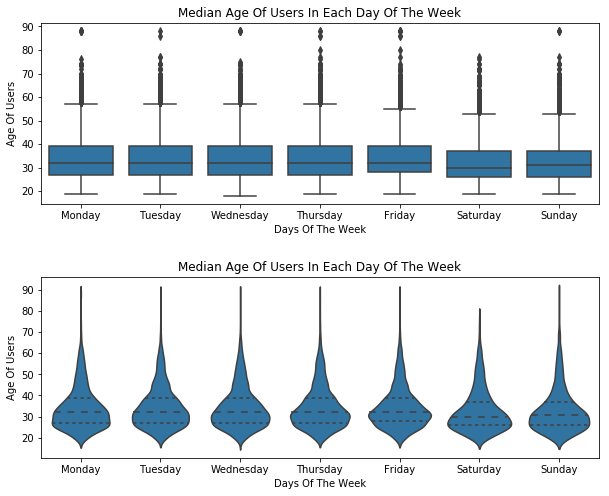

In [39]:
plt.figure(figsize = [10,8])
base_color = sb.color_palette()[0]

# box plots with the relation of the numeric variable 'member_age' 
# with the categoric variable 'day_of_week'
plt.subplot(2, 1, 1)
sb.boxplot(data = bike_share_samp, x = 'day_of_week', y = 'member_age', color = base_color)
plt.title('Median Age Of Users In Each Day Of The Week')
plt.xlabel('Days Of The Week')
plt.ylabel('Age Of Users');

# violin plots with the relation of the numeric variable 'member_age'
# with the categoric variable 'day_of_week'
plt.subplot(2, 1, 2)
sb.violinplot(data = bike_share_samp, x = 'day_of_week', y = 'member_age', color = base_color, inner = 'quartile')
plt.title('Median Age Of Users In Each Day Of The Week')
plt.xlabel('Days Of The Week')
plt.ylabel('Age Of Users');

plt.subplots_adjust(hspace = 0.4)

Along weekdays, the median age of users doesn't present a considerable variation. On the other hand, the box plots show that **on weekends younger individuals use more the bike-sharing system**, resulting in a lower median when compared with weekdays.

Again, the violin plots don't present new insights on the data. They are very similar to each other, the exception are those for Saturday and Sunday.

**6. How does the trip vary along the day? When are trips longer? And shorter?**

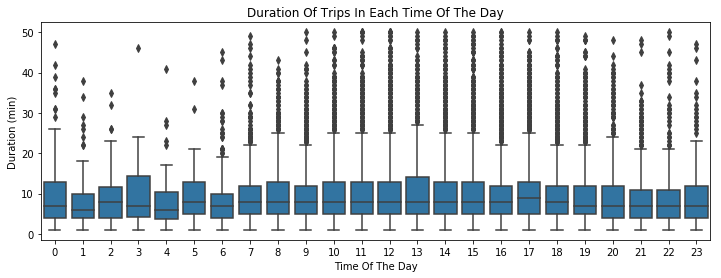

In [40]:
# box plots with the relation of the numeric variable 'duration_min'
# with the categoric variable 'time_of_day'
plt.figure(figsize = [12,4])
sb.boxplot(data = bike_share_samp, x = 'time_of_day', y = 'duration_min', color = base_color)
plt.title('Duration Of Trips In Each Time Of The Day')
plt.xlabel('Time Of The Day')
plt.ylabel('Duration (min)');

**The duration of the trips along the day doesn't vary significantly. The median duration is roughly constant from 7 (a.m.) to 18 (6p.m.)** but presents a small variance in the first and third quartiles with longer trips occuring at 14 (2p.m.). **Besides, even if trips are slightly shorter after 19 (7p.m.), they keep some constancy.**

From 23 (11p.m.) to 5 (a.m.), we may notice that the quartiles vary a lot without some clear pattern. To further investigate it, I will plot a faceting with histograms of the trips duration at each hour. 

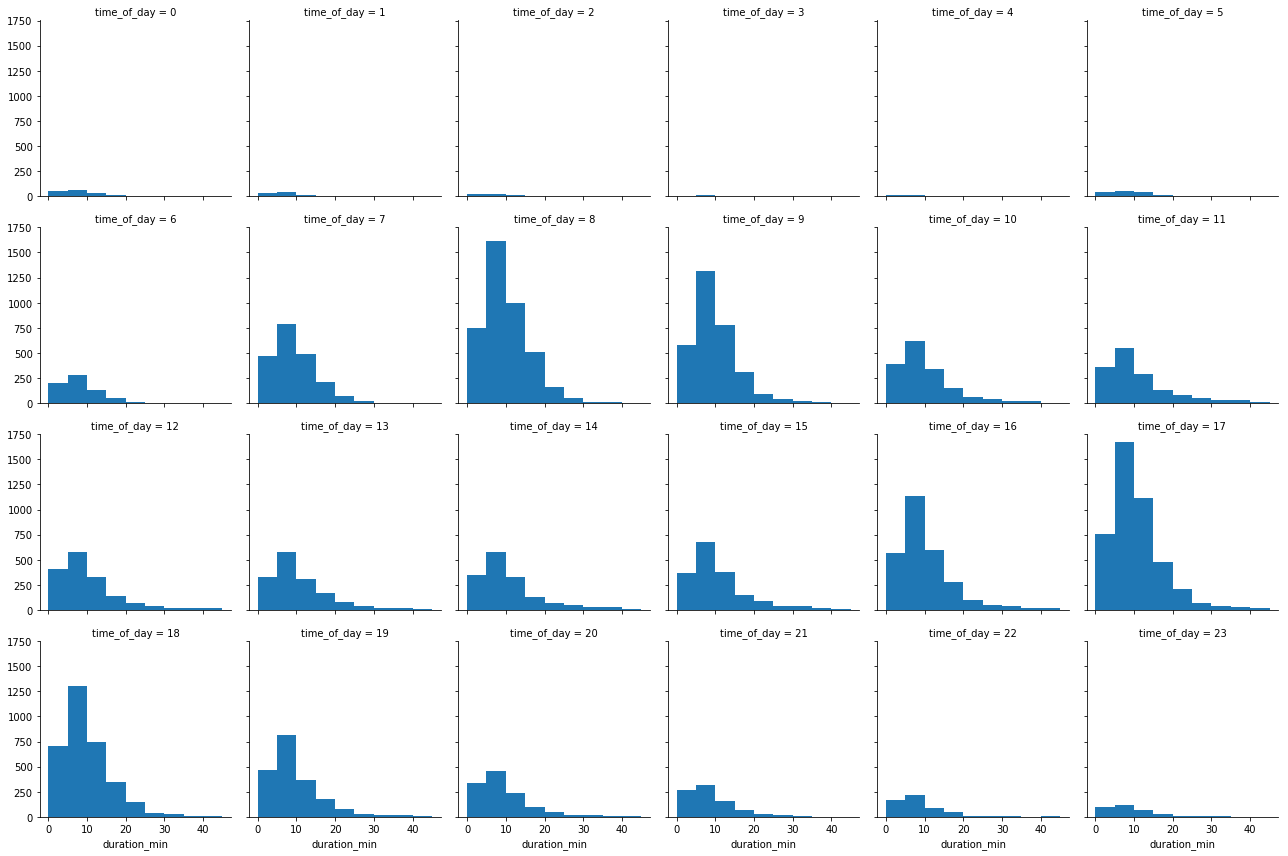

In [41]:
bin_edges = np.arange(0, 50, 5)

# faceting with each time of the day and the duration of the trips
g = sb.FacetGrid(data = bike_share_samp, col = 'time_of_day', col_wrap = 6)
g.map(plt.hist, 'duration_min', bins = bin_edges);

The number of trips changes a lot along the day following a pattern similar to that [found previously](#time_of_day). Important to state here that I am not taking into account the variance happening along the week. This will be the object of ensuing analysis. 

As shown by the plots above, most of the trips occurred from 6 (a.m.) to 22 (10p.m.) and follow a similar pattern with peaks in the number of trips before 10 minutes. From 23 (11p.m.) to 5 (a.m.), it is hard to determine a pattern. Indeed, in the early morning hours (from midnight to 5), we barely have data points. This is probably one reason for the non-constant duration of the trips around this time we have seen in the box plots.

Back to the question, **considering the frequency of trips at each hour, it is possible to say that from 8 (a.m.) to 17 (5p.m.) we have longer duration of the trips. Meanwhile, shorter trips are made at night.**

Without this knowledge, just taking the box plots as a reference, we could end up concluding that trips in the early morning are longer or shorter, as they suffer higher variations due to outliers. We don't have enough data points around this time of the day to make reliable conclusions.

**7. Does the median age of users vary along the day?**

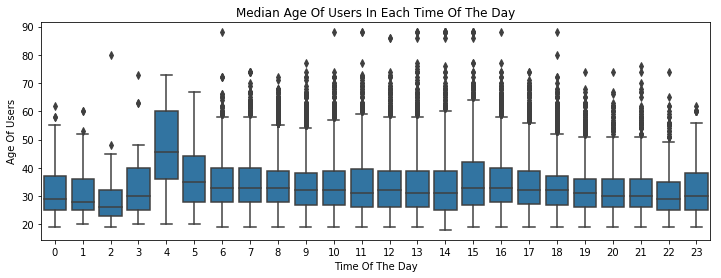

In [42]:
# box plots with the relation of the numeric variable 'member_age'
# with the categoric variable 'time_of_day'
plt.figure(figsize = [12,4])
sb.boxplot(data = bike_share_samp, x = 'time_of_day', y = 'member_age', color = base_color)
plt.title('Median Age Of Users In Each Time Of The Day')
plt.xlabel('Time Of The Day')
plt.ylabel('Age Of Users');

As we can see in the plot, **the age of the individuals using the service doesn't present a significant variation from 8 (a.m.) to 17 (5p.m.). At night, however, the users tends to be slightly younger than those along the day.** 

Similarly to what happens when analyzing duration, here we have an unusual variation of the ages after 23 (11p.m.) till 5 (a.m.). I will check the age distribution at each hour of the day in order to grasp the age dynamic. 

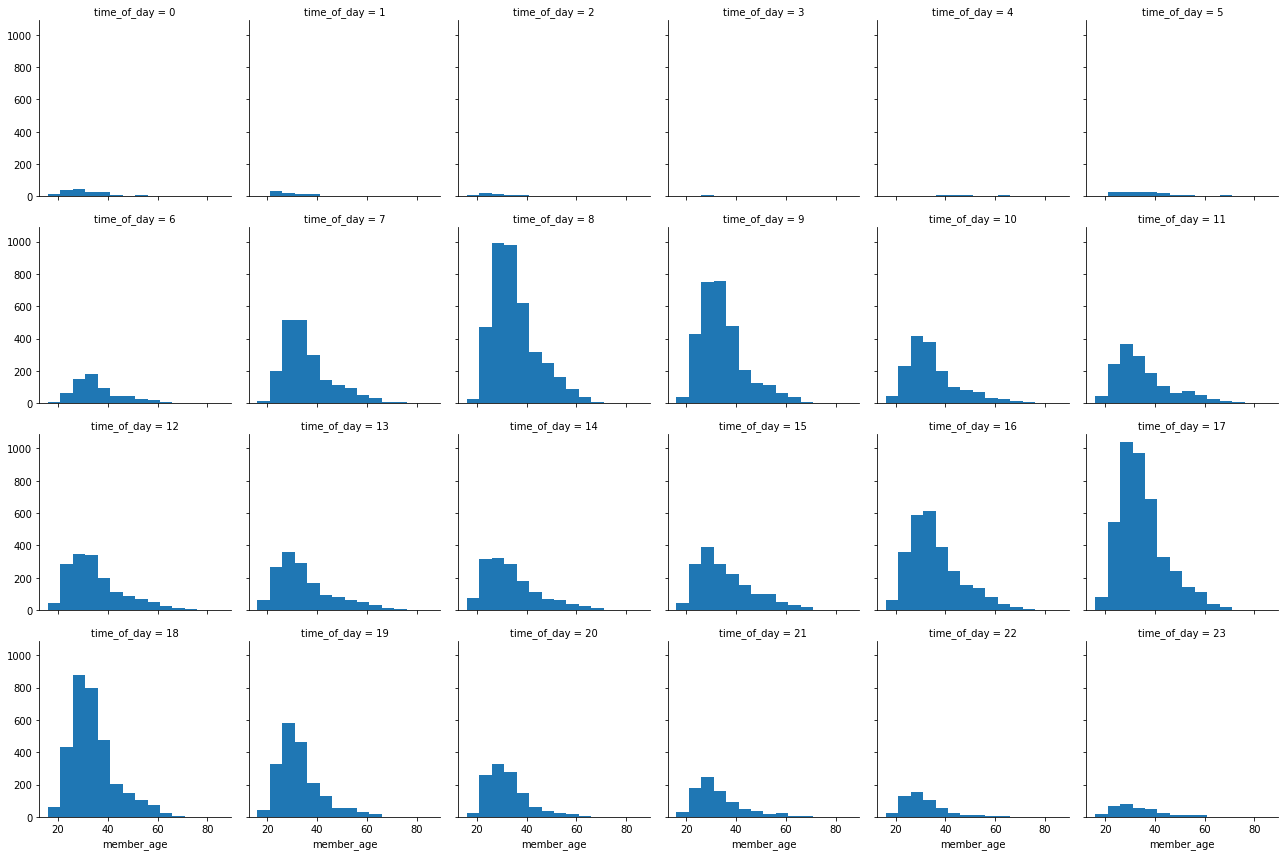

In [43]:
bin_edges = np.arange(16, 90, 5)
# faceting with each time of the day and the age of the users
g = sb.FacetGrid(data = bike_share_samp, col = 'time_of_day', col_wrap = 6)
g.map(plt.hist, 'member_age', bins = bin_edges);

Again, the scarcity of trips made from 23 (11p.m.) to 5 (a.m.) results in statistics strongly influenced by outliers and makes it hard to determine with certainty a pattern. 

On the other hand, **it is possible to notice that from 6 (a.m.) to 22 (10p.m.) most users are in the range 20 to 40 years old. Besides, there is also an important presence of individuals older than 40 from 8 (a.m.) to 18 (6p.m.)**.

> **Finally, I will look at the relation between the categoric variables.**

**8. Does the gender distribution vary along the week? Does the service usage by each gender change in the same period?**

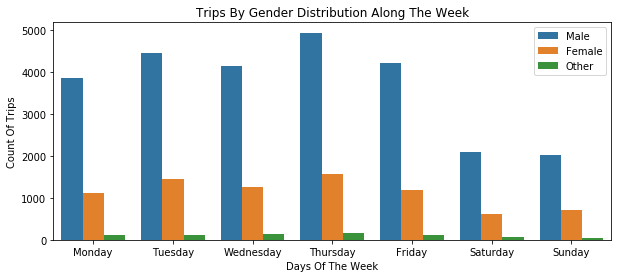

In [44]:
# plot the relation of gender and days of the week
plt.figure(figsize = [10, 4])
ax = sb.countplot(data = bike_share_samp, x = 'day_of_week', hue = 'member_gender')
ax.legend(loc = 1)
plt.title('Trips By Gender Distribution Along The Week')
plt.xlabel('Days Of The Week')
plt.ylabel('Count Of Trips');

**When talking about the gender distribution, we notice that it presents roughly a similar proportion all over the week.** The reason for this is the answer of the second question. 

**For all genders, the service usage is higher along weekdays with a considerable decrease on weekends.** It's a common pattern that determines the almost constant gender distribution in all days of the week.

**9. How does the gender distribution vary along the day?**

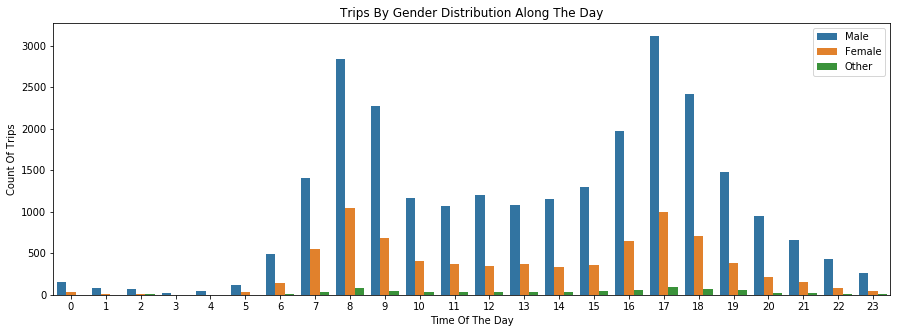

In [45]:
# plot the number of trips in each time of the day for each gender
plt.figure(figsize = [15, 5])
ax = sb.countplot(data = bike_share_samp, x = 'time_of_day', hue = 'member_gender')
ax.legend(loc = 1)
plt.title('Trips By Gender Distribution Along The Day')
plt.xlabel('Time Of The Day')
plt.ylabel('Count Of Trips');

Before we jump to the analysis, it is important to state here that this plot doesn't consider a particular day of the week. That said, **it is clear that the frequency of each gender along the day follows the [same distribution](#time_of_day) found in the univariate analysis. There are two peaks in the usage, one at 8/9 (a.m.) and another at 17/18 (5/6p.m.), the times people go to work and go back home, respectively. Besides, the gender gap seems to be quite constant along the day.**

**10. Is the daily usage of the service the same along the week?**

I will divide the trips in the days of the week. For a clearer comparison, I will also calculate for weekdays and for weekends the mean number of trips made in each hour.

In [46]:
# group trips per hour per day of the week
trips_day_week = bike_share.time_of_day.groupby(bike_share.day_of_week).value_counts()
trips_day_week

day_of_week  time_of_day
Monday       17             3416
             8              3310
             18             2441
             9              2325
             16             2071
             7              1719
             19             1473
             15             1239
             12             1235
             10             1078
             11             1071
             13             1048
             20              952
             14              940
             21              629
             6               611
             22              390
             23              183
             5               133
             0                96
             1                46
             4                41
             2                39
             3                20
Tuesday      8              4398
             17             4118
             9              3339
             18             3258
             16             2276
             7    

In [47]:
# instantiate the trips for each day of the week
monday_trips = trips_day_week.loc['Monday'].sort_index()
tuesday_trips = trips_day_week.loc['Tuesday'].sort_index()
wednesday_trips = trips_day_week.loc['Wednesday'].sort_index()
thursday_trips = trips_day_week.loc['Thursday'].sort_index()
friday_trips = trips_day_week.loc['Friday'].sort_index()
saturday_trips = trips_day_week.loc['Saturday'].sort_index()
sunday_trips = trips_day_week.loc['Sunday'].sort_index()

# calculate the mean of trips per hour for weekdays and for weekend
mean_weekdays_trips = (monday_trips + tuesday_trips + wednesday_trips + thursday_trips + friday_trips)//5
mean_weekend_trips = (saturday_trips + sunday_trips)//2

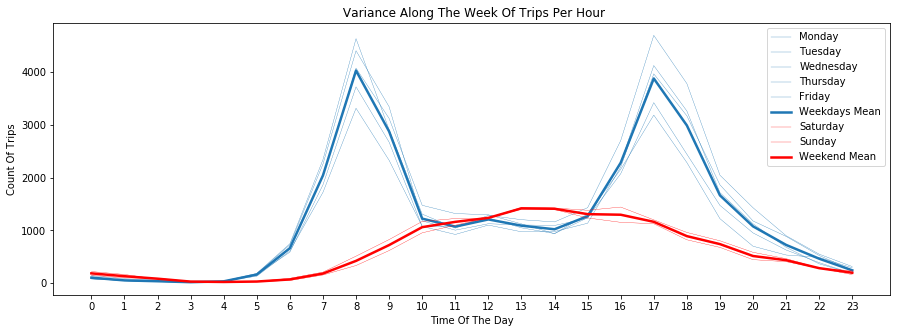

In [48]:
# set color for weekdays and the plot size
color_weekdays = sb.color_palette()[0]
plt.figure(figsize = [15, 5])

# plot weekdays
plt.plot(monday_trips, color = color_weekdays, lw = 0.3)
plt.plot(tuesday_trips, color = color_weekdays, lw = 0.3)
plt.plot(wednesday_trips, color = color_weekdays, lw = 0.3)
plt.plot(thursday_trips, color = color_weekdays, lw = 0.3)
plt.plot(friday_trips, color = color_weekdays, lw = 0.3)
plt.plot(mean_weekdays_trips, color = color_weekdays, lw = 2.5)

# plot weekend
plt.plot(saturday_trips, color = 'r', lw = 0.3)
plt.plot(sunday_trips, color = 'r', lw = 0.3)
plt.plot(mean_weekend_trips, color = 'r', lw = 2.5)

# use monday_trips indices as ticks in x-axis and set legend
plt.xticks(monday_trips.index)
plt.legend(labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Weekdays Mean',
                     'Saturday', 'Sunday', 'Weekend Mean'])
plt.title(' Variance Along The Week Of Trips Per Hour')
plt.xlabel('Time Of The Day')
plt.ylabel('Count Of Trips');

The resulting plot is very insightful of the hourly usage along the week. 

**During weekdays, we can establish two peaks related to the time people go to work and the time they go back home, as stated previously. The two peaks happen around 8 (a.m.) and around 17 (5 p.m.).** 

When we look at the red line representing the weekends mean,**we notice that the bike-sharing dynamic is different during weekends. The peak happens at 13/14 (1/2 p.m.) with high levels of people using the system from 10 (a.m.) to 18 (6 p.m.)**, in many occasions higher than those registered on weekdays. 

Another point of attention is the usage in the early morning hours. Even though weekdays have in overall a greater number of trips, weekends are busier from midnight to 3 (a.m.).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When comparing the usage dynamic along the week with the numeric variables, I came across some small interactions. I found out that the duration of trips is quite constant. In fact, there is just a slight variation of the third quartile of the duration on weekends, in other words, we may find longer trips on weekends. In terms of age, there is a higher proportion of younger people using the service on weekends than on weekdays. In the case of the categoric variable related to gender, the clustered bar chart revealed that the gender gap is roughly constant in the week. Indeed, each gender presents a similar pattern of number of trips, accounting for busier weekdays.  
>
> Following that, the analysis of the hourly usage dynamic has shown that duration and age don't vary significantly along the day, with most trips lasting less than 10 minutes and most users aged 20 to 40 years old in each hour of the day. When it comes to gender, we noticed a persistent gender gap that looks roughly the same along the day. 
>
> Finally the most insightful plot was the usage dynamic along the day considering each day of the week. Through the line plot, it is possible to follow the mean number of trips occurring on weekdays and on weekends. Insterestingly, we found out that on working days there are two peaks of usage, when people go to work and go back home. Weekends are marked by busier times in the afternoon. **I will use this usage dynamic in my further investigations to understand how each gender usage varies along the day in each day of the week. I expect to find a similar pattern among them.**

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The interesting fact is that I erroneously assumed that there would be a significant interaction between age and duration of the trips,  it turns out that there is a quite weak relationship. Besides, when comparing these numeric variables with user type and gender, I didn't find any important interactions. That is one of the reasons why **I won't further use in my analysis the feature age or the different user types.** However, I am curious about the interaction between duration and each gender along the week and I'll carry out a deeper investigation of these features. 

## Multivariate Exploration

> **Now I'll look further at the gender distribution along the week and along the day with an initial focus on the variance of the trips duration for each gender.**

**1. How does the duration of the trips vary along the week for each gender?**

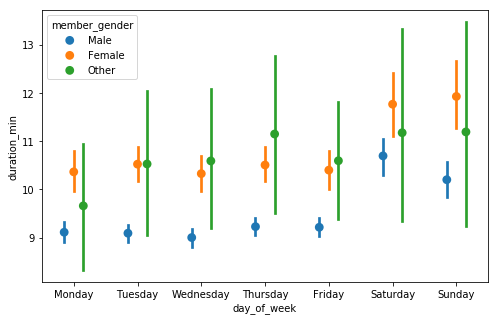

In [49]:
# point plot of the trips duration for each gender in each day of the week
plt.figure(figsize = [8, 5])
ax = sb.pointplot(data = bike_share_samp, x = 'day_of_week', y = 'duration_min', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")

**The plot above clearly shows that trips tend to be longer on weekends. Besides, another point of attention is that trips made by Male individuals are shorter than those made by the other genders in all days of the week. One possible explanation for this difference might be that same feeling of insecurity that make women less prone to cycle, in other words, women might be more careful to ride a bike than men, resulting in longer trips.**

It is important to notice that people other than Female and Male account for a smaller number of trips in the dataset which is the probable reason for the considerable duration variance of points in the 'Other' category. 

**2. How is the duration variance along the day for each gender?**

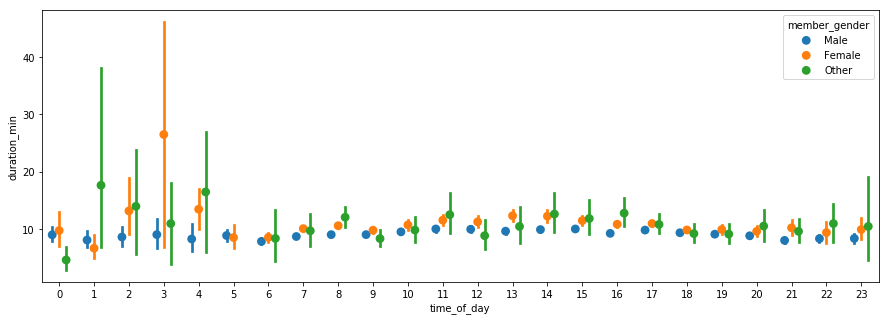

In [50]:
# point plot of the duration of the trips for each gender in hour of the day
plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = bike_share_samp, x = 'time_of_day', y = 'duration_min', hue = 'member_gender',
                  dodge = 0.4, linestyles = "")

Again the scarcity of data points from 23 (11 p.m.) to 5 (a.m.) makes it difficult to visualize patterns in this period. 

On the other hand, we may draw conclusions in the period starting at 6 (a.m.) till 22 (10 p.m.). Here we notice, one more time, that **trips made by Male individuals are shorter than those made by the other genders. In addition, for Male and Female individuals, trips seem to be shorter in the morning (from 6 to 9 a.m.) and at night.**

**3. How does the gender composition vary on weekdays and on weekends along the day?**

In [51]:
thursday_trips = bike_share_samp.query('day_of_week == "Thursday"')
saturday_trips = bike_share_samp.query('day_of_week == "Saturday"')

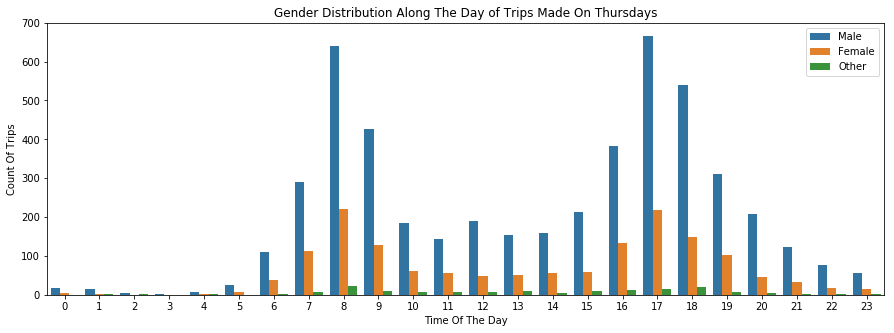

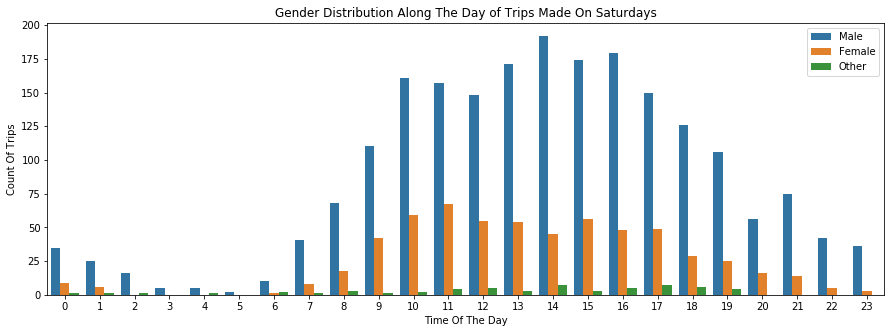

In [52]:
# plot the number of trips made on Thursdays in each time of the day for each gender 
plt.figure(figsize = [15, 5])
ax = sb.countplot(data = thursday_trips, x = 'time_of_day', hue = 'member_gender')
ax.legend(loc = 1)
plt.title('Gender Distribution Along The Day of Trips Made On Thursdays')
plt.xlabel('Time Of The Day')
plt.ylabel('Count Of Trips');

# plot the number of trips made on Saturdays in each time of the day for each gender 
plt.figure(figsize = [15, 5])
ax = sb.countplot(data = saturday_trips, x = 'time_of_day', hue = 'member_gender')
ax.legend(loc = 1)
plt.title('Gender Distribution Along The Day of Trips Made On Saturdays')
plt.xlabel('Time Of The Day')
plt.ylabel('Count Of Trips');

I decided to use trips made on Thursdays to represent weekdays as this is the busiest day of the week, and those made on Saturdays to represent weekends. Indeed, the variation in the gender distribution is similar among the weekdays and the weekends, respectively. My goal here is to analyze the different hourly dynamics in these two periods of the week. 

**It seems that the gender distribution is quite constant on weekdays following the pattern of two peaks representing the home-work-home routine. The same does not hold true for weekends, when the bike-sharing system is busier in the late morning and in the afternoon. Interestingly, on weekends, the gender gap from 9 to 12 looks smaller when compared to other times of the day. It is, probably, the period of the week with the smallest gap.** 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through the use of point plots, I could better visualize the usage dynamic along the week and along the day by each gender. In this process, I became aware of the trips duration difference among the genders. In fact, when we compared just the duration and the genders, we ended up concluding that trips take roughly the same time for all genders and don't have a huge variation along the week. But here, we drew other conclusion, in other words, trips made by Male individuals are shorter than the other genders and trips for all genders are shorter on weekdays.

### Were there any interesting or surprising interactions between features?

> In the analysis of the hourly usage on Thursdays and on Saturdays, I came across an interesting fact. There is a reduction of the gender gap in the morning hours of Saturdays. This is information was hidden in the plots made previously.

## Conclusions
>This project brought light to the usage dynamic of the service along the week and along the day. There is a significant variation when we compare the periods of the week. Weekdays are usually busier and are characterized by two peaks of usage, which represent the home-work-home routine. Weekends have just one peak that is almost a plateau in the late morning and in the afternoon. Besides, they present longer trips and younger people using the service. In this analysis, I limited to user age at 90 years old and the duration of the trips at 50 minutes. Interestingly, there is a weak correlation between these two numeric variables. Indeed, I decided not to keep my investigations on the age feature.
>
>In this exploratory process, I came across the huge gender gap existing among the users of the service. Interested in this fact, I made further investigations trying to understand the behavior of this feature when compared with the other variables of interest. I ended up concluding that trips made by Male individuals are shorter than those made by the other genders in all days of the week. The same tendency is verified in an hourly basis. In addition, it seems that the gender distribution is quite constant on weekdays. On the other hand, I noticed that, on weekends, for a period of time the gender gap decreases. As stated in the analysis, a possible reason for the gender gap is that womem feel unsafer to cycle.
